In [4]:
 

# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\HP\Downloads\New folder (3)\movies.csv',encoding = 'unicode_escape')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
writer - 0%
year - 0%


In [6]:
print(df.dtypes)


budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object


In [9]:
df["gross"]=df["gross"].astype("int64")
df["budget"]=df["budget"].astype("int64")

In [10]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [11]:
#correct the conspirancy between year and release date 
df["released"]=pd.to_datetime(df["released"])

In [13]:
df["yearcorrect"]=df["released"].dt.year

In [14]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986,1986


In [18]:
df=df.sort_values(by="gross",ascending=False)



In [23]:
df.drop_duplicates()
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012


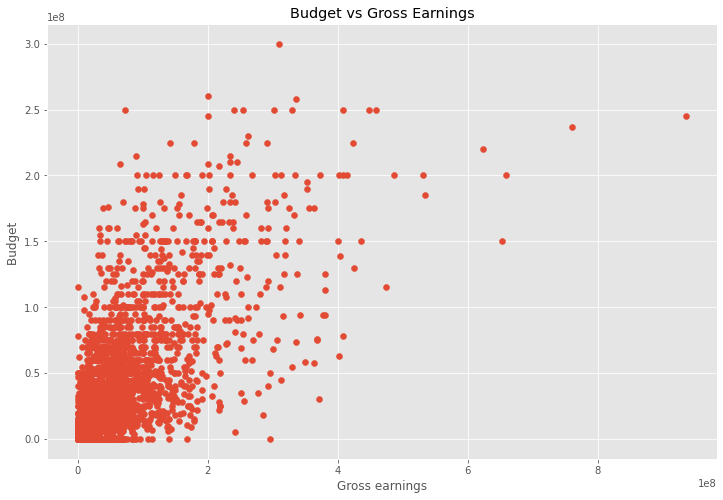

In [27]:
#scatter plot with budget vs gross
plt.scatter(x=df["gross"], y=df["budget"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross earnings")
plt.ylabel("Budget ")
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

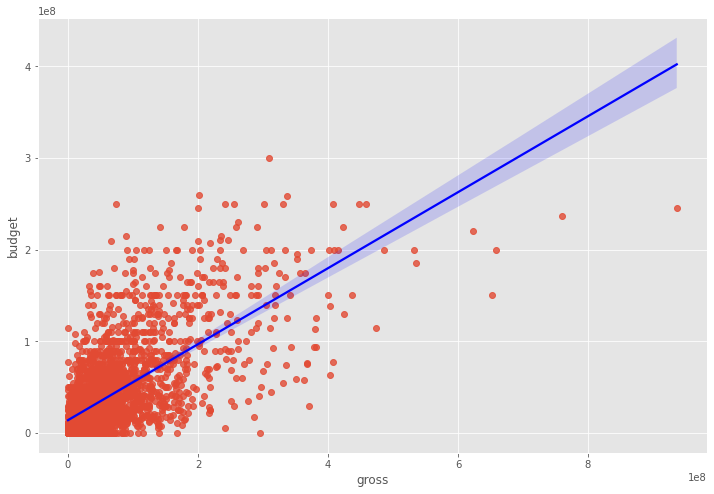

In [29]:

#plot budget vs gross using seaborn
sns.regplot(x="gross", y="budget", data=df,line_kws={"color":"blue"})


In [30]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson') #default

,budget,gross,runtime,score,year,yearcorrect
budget,1.000000,0.682588,0.309652,0.019061,0.374904,0.361727
gross,0.682588,1.000000,0.238183,0.171825,0.246975,0.234971
runtime,0.309652,0.238183,1.000000,0.386864,0.127864,0.130664
score,0.019061,0.171825,0.386864,1.000000,0.109251,0.119861
year,0.374904,0.246975,0.127864,0.109251,1.000000,0.996846
yearcorrect,0.361727,0.234971,0.130664,0.119861,0.996846,1.000000


In [31]:
df.corr(method ='kendall')


,budget,gross,runtime,score,year,yearcorrect
budget,1.000000,0.506346,0.215957,-0.024237,0.264997,0.253408
gross,0.506346,1.000000,0.149250,0.042364,0.161160,0.148313
runtime,0.215957,0.149250,1.000000,0.268800,0.100660,0.101864
score,-0.024237,0.042364,0.268800,1.000000,0.072388,0.080473
year,0.264997,0.161160,0.100660,0.072388,1.000000,0.987412
yearcorrect,0.253408,0.148313,0.101864,0.080473,0.987412,1.000000


In [32]:
df.corr(method ='spearman')


,budget,gross,runtime,score,year,yearcorrect
budget,1.000000,0.688931,0.309472,-0.035468,0.374810,0.358174
gross,0.688931,1.000000,0.215672,0.058290,0.229680,0.210499
runtime,0.309472,0.215672,1.000000,0.381596,0.147590,0.149620
score,-0.035468,0.058290,0.381596,1.000000,0.105782,0.117675
year,0.374810,0.229680,0.147590,0.105782,1.000000,0.996870
yearcorrect,0.358174,0.210499,0.149620,0.117675,0.996870,1.000000


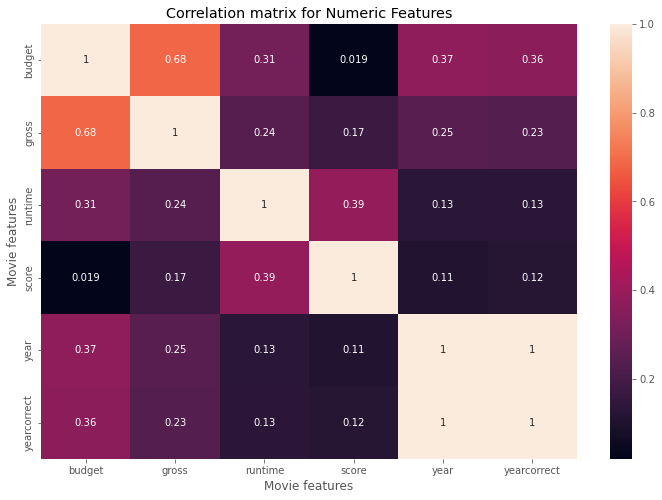

In [33]:
#plotting correlation matrix using seaborn

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [34]:
#include all columns in the matrix
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized



,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,2015-12-18,136,8.1,236,1106,2015,2015
2302,237000000,837,36,478,0,760507625,219,5,2009-12-18,162,7.8,986,768,2009,2009
1100,200000000,837,37,478,6,658672302,2852,5,1997-12-19,194,7.8,699,768,1997,1997
2916,150000000,846,37,207,0,652270625,1246,5,2015-06-12,124,7.0,203,1545,2015,2015
2603,220000000,596,37,656,0,623357910,2276,5,2012-05-04,143,8.1,946,1010,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,894,9,706,6,5000,1310,6,2015-02-27,92,6.7,736,80,2014,2015
1074,0,119,9,880,5,4440,1807,2,1996-08-30,105,7.4,669,851,1996,1996
2311,47000000,663,3,473,6,3600,1553,6,2013-09-26,141,7.9,499,764,2009,2013
1466,5000000,265,5,584,6,2554,826,7,2001-05-18,108,6.8,352,1033,2000,2001


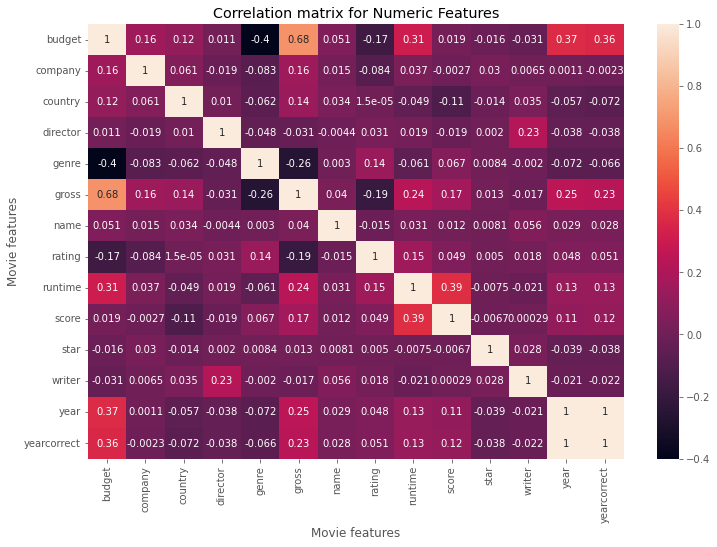

budget       budget         1.000000
             company        0.157083
             country        0.118863
             director       0.011052
             genre         -0.401052
                              ...   
yearcorrect  score          0.119861
             star          -0.038432
             writer        -0.021537
             year           0.996846
             yearcorrect    1.000000
Length: 196, dtype: float64


In [36]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()
corr_pairs = correlation_matrix.unstack()

print(corr_pairs)

In [38]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.401052
genre        budget        -0.401052
gross        genre         -0.263051
genre        gross         -0.263051
gross        rating        -0.191666
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 196, dtype: float64

In [39]:
#picking high corr
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        budget         0.682588
budget       gross          0.682588
yearcorrect  year           0.996846
year         yearcorrect    0.996846
budget       budget         1.000000
writer       writer         1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64